# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"
number = 0
sets = 1

# variables to collect
city_data = {"City": [],
       "Cloudiness": [],
       "Country": [],
       "Date": [],
       "Humidity": [],
       "Lat": [],
       "Lng": [],
       "Max Temp": [],
       "Wind Speed": []}


# set up initial message
print(f"Beginning Data Retrieval")
print("-------------------------")

# Build query URL
for city in cities:
    query_url = url + "&appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    number = number + 1
    if number == 51:
        sets = sets+1
        number = 1
    try:
        print(f"Processing Record {number} of Set {sets} | {city}")
        city_data["City"].append(response['name'])
        city_data["Cloudiness"].append(response['clouds']['all'])
        city_data["Country"].append(response['sys']['country'])
        city_data["Date"].append(response['dt'])
        city_data["Humidity"].append(response['main']['humidity'])
        city_data["Lat"].append(response['coord']['lat'])
        city_data["Lng"].append(response['coord']['lon'])
        city_data["Max Temp"].append(response['main']['temp_max'])
        city_data["Wind Speed"].append(response['wind']['speed'])
    except:
        print("City not found. Skipping ...")
    time.sleep(.2)

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | biasca
Processing Record 2 of Set 1 | porto seguro
Processing Record 3 of Set 1 | sokoni
Processing Record 4 of Set 1 | chino valley
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | diplo
Processing Record 7 of Set 1 | amderma
City not found. Skipping ...
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | padang
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | eirunepe
Processing Record 18 of Set 1 | la palma
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | safaga
Processing Record 22 of Set 1 | cidreira
Processing Record 23 of S

Processing Record 41 of Set 4 | gizo
Processing Record 42 of Set 4 | jiddah
City not found. Skipping ...
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | aswan
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | el dorado
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | belmonte
Processing Record 1 of Set 5 | kedougou
Processing Record 2 of Set 5 | grand-santi
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | ust-tsilma
Processing Record 5 of Set 5 | bakloh
Processing Record 6 of Set 5 | avera
Processing Record 7 of Set 5 | kuala terengganu
Processing Record 8 of Set 5 | cotonou
Processing Record 9 of Set 5 | klaksvik
Processing Record 10 of Set 5 | marcona
City not found. Skipping ...
Processing Record 11 of Set 5 | lavrentiya
Processing Record 12 of Set 5 | sola
Processing Record 13 of Set 5 | dzialdow

Processing Record 29 of Set 8 | fukue
Processing Record 30 of Set 8 | gbongan
Processing Record 31 of Set 8 | riyadh
Processing Record 32 of Set 8 | alyangula
Processing Record 33 of Set 8 | beringovskiy
Processing Record 34 of Set 8 | back mountain
Processing Record 35 of Set 8 | kailua
Processing Record 36 of Set 8 | sahrak
City not found. Skipping ...
Processing Record 37 of Set 8 | kruisfontein
Processing Record 38 of Set 8 | saskylakh
Processing Record 39 of Set 8 | bozova
Processing Record 40 of Set 8 | pachalum
Processing Record 41 of Set 8 | tabas
Processing Record 42 of Set 8 | pedernales
Processing Record 43 of Set 8 | zhezkazgan
Processing Record 44 of Set 8 | sao joao da barra
Processing Record 45 of Set 8 | quatre cocos
Processing Record 46 of Set 8 | dukat
Processing Record 47 of Set 8 | kousseri
Processing Record 48 of Set 8 | kurchum
Processing Record 49 of Set 8 | sorvag
City not found. Skipping ...
Processing Record 50 of Set 8 | dioknisi
Processing Record 1 of Set 9 

Processing Record 15 of Set 12 | geraldton
Processing Record 16 of Set 12 | tezu
Processing Record 17 of Set 12 | north platte
Processing Record 18 of Set 12 | kolokani
Processing Record 19 of Set 12 | rongcheng
Processing Record 20 of Set 12 | bojnurd
Processing Record 21 of Set 12 | ondorhaan
City not found. Skipping ...
Processing Record 22 of Set 12 | kamaishi
Processing Record 23 of Set 12 | hai phong
City not found. Skipping ...
Processing Record 24 of Set 12 | topchikha
Processing Record 25 of Set 12 | hay river
Processing Record 26 of Set 12 | hamilton
Processing Record 27 of Set 12 | ketchikan
Processing Record 28 of Set 12 | potanino
Processing Record 29 of Set 12 | klyuchevskiy
Processing Record 30 of Set 12 | lardos
Processing Record 31 of Set 12 | loikaw
Processing Record 32 of Set 12 | marabba
Processing Record 33 of Set 12 | pastavy
Processing Record 34 of Set 12 | olinda
Processing Record 35 of Set 12 | solovetskiy
City not found. Skipping ...
Processing Record 36 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather = pd.DataFrame(city_data)
city_weather.count()

City          589
Cloudiness    589
Country       589
Date          589
Humidity      589
Lat           589
Lng           589
Max Temp      589
Wind Speed    589
dtype: int64

In [5]:
# create dataframe
city_weather_df = pd.DataFrame({"City":city_data["City"],
                                "Country":city_data["Country"],
                                "Date":city_data["Date"],
                                "Lat":city_data["Lat"],
                                "Lng":city_data["Lng"],
                                "Max Temp":city_data["Max Temp"],
                                "Wind Speed":city_data["Wind Speed"],
                                "Cloudiness":city_data["Cloudiness"],
                                "Humidity":city_data["Humidity"]
                               })
city_weather_df

,City,Country,Date,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity
0,Biasca,CH,1592415612,46.36,8.97,68.00,4.70,20,68
1,Porto Seguro,BR,1592415613,-16.45,-39.06,78.80,10.29,40,61
2,Sokoni,TZ,1592415613,-6.43,39.55,78.87,17.94,2,74
3,Chino Valley,US,1592415613,34.76,-112.45,82.99,12.75,1,19
4,Hithadhoo,MV,1592415613,-0.60,73.08,84.49,6.67,36,73
...,...,...,...,...,...,...,...,...,...
584,Câmara de Lobos,PT,1592415782,32.63,-16.97,73.00,3.36,40,88
585,Xam Nua,LA,1592415782,20.42,104.04,68.92,3.31,90,93
586,Dongsheng,CN,1592415782,39.82,109.98,62.89,7.90,35,50
587,Syumsi,RU,1592415782,57.11,51.61,54.18,4.16,0,79


In [6]:
# print to csv file
#export dataframe to CSV file
city_weather_df.to_csv(output_data_file, encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

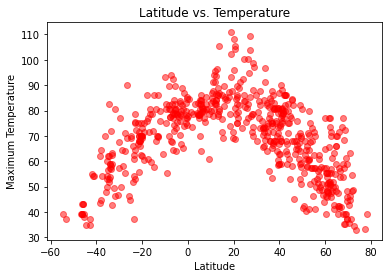

In [7]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", facecolor="red", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Temperature")
plt.savefig("output_data/WeatherPy/lat_v_temp.png")

#### Latitude vs. Humidity Plot

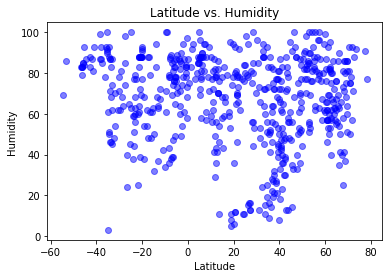

In [8]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", facecolor="blue", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig("output_data/WeatherPy/lat_v_humidity.png")

#### Latitude vs. Cloudiness Plot

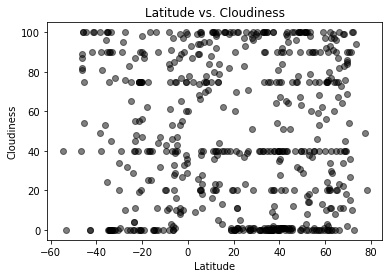

In [9]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", facecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig("output_data/WeatherPy/lat_v_cloudiness.png")

#### Latitude vs. Wind Speed Plot

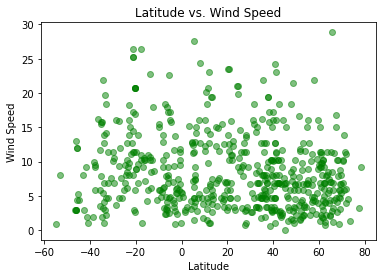

In [10]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker="o", facecolor="green", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig("output_data/WeatherPy/lat_v_wind.png")

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def LinReg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression = x*slope+intercept
    line_eq = f"y={slope}x+{intercept}"
    plt.plot(x, regression, "black")
    plt.show
    return print(f"The value of r-squared is {rvalue**2}."), print(f"The line equation is: {line_eq}.")

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = city_weather_df.loc[city_weather_df['Lat']>=0]
south_hem = city_weather_df.loc[city_weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is 0.5498069844936997.
The line equation is: y=-0.5817159451578479x+93.04666123436432.


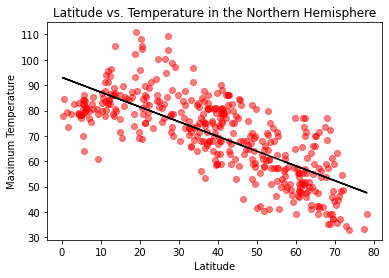

In [13]:
fig=plt.figure()
plt.scatter(north_hem["Lat"], north_hem["Max Temp"], marker="o", facecolor="red", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Temperature in the Northern Hemisphere")
LinReg(north_hem["Lat"], north_hem["Max Temp"])
plt.savefig("output_data/WeatherPy/northhem_lat_v_temp_linreg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is 0.6190530581285892.
The line equation is: y=0.8016104307301903x+83.45174846693514.


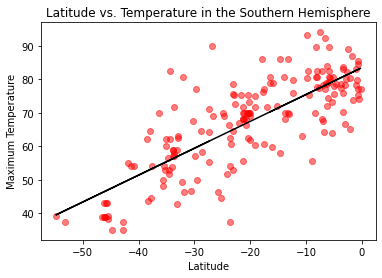

In [14]:
fig=plt.figure()
plt.scatter(south_hem["Lat"], south_hem["Max Temp"], marker="o", facecolor="red", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Temperature in the Southern Hemisphere")
LinReg(south_hem["Lat"], south_hem["Max Temp"])
plt.savefig("output_data/WeatherPy/southhem_lat_v_temp_linreg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is 0.00048528959378441554.
The line equation is: y=0.02512162263011085x+64.02527577264853.


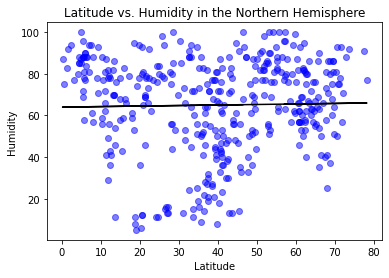

In [15]:
fig=plt.figure()
plt.scatter(north_hem["Lat"], north_hem["Humidity"], marker="o", facecolor="blue", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in the Northern Hemisphere")
LinReg(north_hem["Lat"], north_hem["Humidity"])
plt.savefig("output_data/WeatherPy/northhem_lat_v_humidity_linreg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is 0.01111930356919595.
The line equation is: y=-0.13967715812187184x+68.9970170080321.


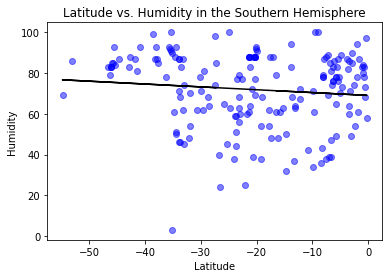

In [16]:
fig=plt.figure()
plt.scatter(south_hem["Lat"], south_hem["Humidity"], marker="o", facecolor="blue", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in the Southern Hemisphere")
LinReg(south_hem["Lat"], south_hem["Humidity"])
plt.savefig("output_data/WeatherPy/southhem_lat_v_humidity_linreg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is 0.001986979128431095.
The line equation is: y=-0.08417939576612044x+50.36043340617129.


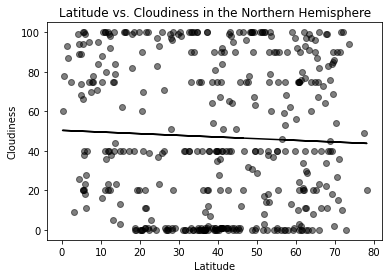

In [17]:
fig=plt.figure()
plt.scatter(north_hem["Lat"], north_hem["Cloudiness"], marker="o", facecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in the Northern Hemisphere")
LinReg(north_hem["Lat"], north_hem["Cloudiness"])
plt.savefig("output_data/WeatherPy/northhem_lat_v_cloudiness_linreg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is 0.008848263230422026.
The line equation is: y=-0.24556551167939214x+42.45519712367784.


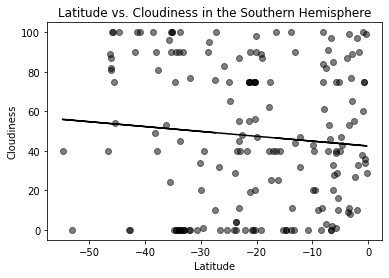

In [18]:
fig=plt.figure()
plt.scatter(south_hem["Lat"], south_hem["Cloudiness"], marker="o", facecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in the Southern Hemisphere")
LinReg(south_hem["Lat"], south_hem["Cloudiness"])
plt.savefig("output_data/WeatherPy/southhem_lat_v_cloudiness_linreg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is 0.02522025338214141.
The line equation is: y=-0.04185409019282642x+9.682874950852858.


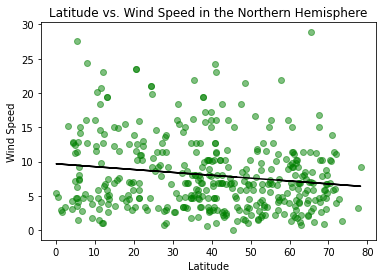

In [19]:
fig=plt.figure()
plt.scatter(north_hem["Lat"], north_hem["Wind Speed"], marker="o", facecolor="green", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in the Northern Hemisphere")
LinReg(north_hem["Lat"], north_hem["Wind Speed"])
plt.savefig("output_data/WeatherPy/northhem_lat_v_wind_linreg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is 0.0005652505586208005.
The line equation is: y=0.009879683929392114x+9.561019790416664.


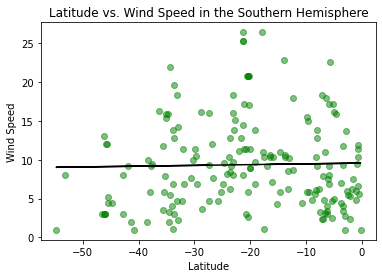

In [20]:
fig=plt.figure()
plt.scatter(south_hem["Lat"], south_hem["Wind Speed"], marker="o", facecolor="green", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in the Southern Hemisphere")
LinReg(south_hem["Lat"], south_hem["Wind Speed"])
plt.savefig("output_data/WeatherPy/southhem_lat_v_wind_linreg.png")